# HW9 - DNN神經網路分類器
#### 【Python人工智慧實戰_2020-06-10】

In [1]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical 

Using TensorFlow backend.


In [2]:
df = pd.read_csv('diabetes.csv') 
print(df.shape)
df.describe()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
target_column = ['label'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.194990,0.410381,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.136913,0.145188,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032231,0.259259,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.100723,0.296296,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.153926,0.358025,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.258781,0.506173,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
X = df[predictors].values
y = df[target_column].values

seed = 40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [5]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
learning_rate = 0.001
batch_size = 24
num_classes = y_test.shape[1] # 預測的類別數目
epochs = [50, 100, 150] # one epoch = Iterations（疊代）= N = numbers of training data/batch_size

In [7]:
def build_DNN(input_shape, output_units, num_neurons=[16, 24, 32, 64], drp_ratio=0.2):
    model = Sequential()
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            # num of features in input layer
            model.add(Dense(units=n_units, activation="relu", name="input", input_shape=[input_shape]))
        else:
            # add hidden layer
            model.add(Dense(units=n_units, activation="relu", name="hidden_layer" + str(i+1)))
            model.add(Dropout(drp_ratio)) # add dropout
            
    model.add(Dense(units=output_units, activation="softmax", name="output"))
    return model

In [8]:
def plt_model_result(result):
    num_colors = len(result.keys())
    cm = plt.get_cmap('gist_rainbow')
    color_bar = [cm(1. * i/num_colors) for i in range(num_colors)]
    
    plt.figure(figsize=(16, 9))
    for i, cond in enumerate(result.keys()):
        plt.plot(range(len(result[cond]['train-loss'])), result[cond]['train-loss'], '-', label = 'train-' + cond, color = color_bar[i])
        plt.plot(range(len(result[cond]['valid-loss'])), result[cond]['valid-loss'], '--', label = 'valid-' + cond, color = color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()    
    
    plt.figure(figsize=(16, 9))    
    for i, cond in enumerate(result.keys()):
        plt.plot(range(len(result[cond]['train-acc'])), result[cond]['train-acc'], '-', label = 'train-' + cond, color = color_bar[i])
        plt.plot(range(len(result[cond]['valid-acc'])), result[cond]['valid-acc'], '--', label = 'valid-' + cond, color = color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

In [9]:
# build DNN model
model = build_DNN(X_test.shape[1], num_classes)

# summary model
model.summary()

# compile the model
optimizer = keras.optimizers.Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                144       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                800       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [10]:
results = {}

# train model
model.fit(X_train, y_train, batch_size=batch_size, validation_data = (X_test, y_test), epochs=150, verbose=1)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

exp_name_tag = 'Dropout: {}'.format(str(0.2))
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Train on 537 samples, validate on 231 samples
Epoch 1/150
537/537 [==============================] - 0s 642us/step - loss: 0.6774 - accuracy: 0.6313 - val_loss: 0.6807 - val_accuracy: 0.6147
Epoch 2/150
537/537 [==============================] - 0s 126us/step - loss: 0.6588 - accuracy: 0.6667 - val_loss: 0.6769 - val_accuracy: 0.6147
Epoch 3/150
537/537 [==============================] - 0s 115us/step - loss: 0.6430 - accuracy: 0.6667 - val_loss: 0.6688 - val_accuracy: 0.6147
Epoch 4/150
537/537 [==============================] - 0s 100us/step - loss: 0.6290 - accuracy: 0.6667 - val_loss: 0.6596 - val_accuracy: 0.6147
Epoch 5/150
537/537 [==============================] - 0s 117us/step - loss: 0.6278 - accuracy: 0.6685 - val_loss: 0.6452 - val_accuracy: 0.6147
Epoch 6/150
537/537 [==============================] - 0s 119us/step - loss: 0.6071 - accuracy: 0.6704 - val_loss: 0.6213 - val_accuracy: 0.6190
Epoch 7/150
537/537 [==============================] - 0s 110us/step - loss: 0.5832 

In [11]:
print("Experiment with Epoch: %.0f, Dropout: %.2f\n" % (150, 0.2))
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \nError on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores2[1], 1 - scores2[1]))

Experiment with Epoch: 150, Dropout: 0.20

Accuracy on training data: 0.8715083599090576% 
Error on training data: 0.12849164009094238
Accuracy on test data: 0.7489177584648132% 
Error on test data: 0.25108224153518677


<Figure size 432x288 with 0 Axes>

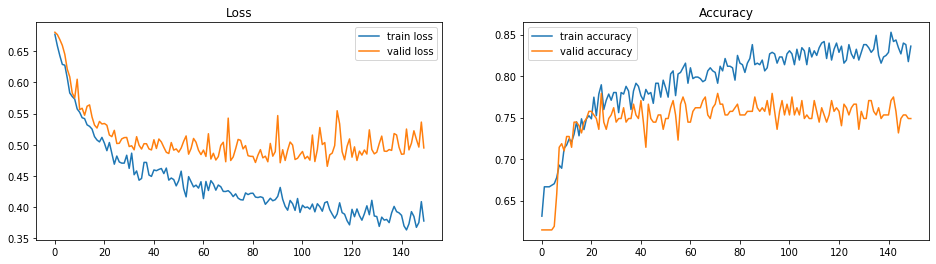

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.subplots_adjust(left=0.5)
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show

plt.subplot(1, 2, 2)
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [13]:
# compare with different epoch & drop_ratio
import itertools

'''
 verbose=0 show nothing of training progress
 verbose=1 show an animated progress bar of training progress like: [==============================]
 verbose=2 mention the number of epoch like: Epoch 16/100
'''

results = {}
drp_ratios = [0.2, 0.4]
for epoch, drop_rate in itertools.product(epochs, drp_ratios):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    
    # build DNN model
    model = build_DNN(X_test.shape[1], num_classes, drp_ratio=drop_rate)
    
    # summary model
    model.summary()
    
    # compile the model
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # train model
    model.fit(X_train, y_train, batch_size=batch_size, validation_data = (X_test, y_test), epochs=epoch, verbose=0)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = 'Epoch:{}, Dropout: {}'.format(str(epoch), str(drop_rate))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    print("Experiment with Epoch: %.0f, Dropout: %.2f\n" % (epoch, drop_rate))
    scores = model.evaluate(X_train, y_train, verbose=0)
    print('Accuracy on training data: {}% \nError on training data: {}'.format(scores[1], 1 - scores[1]))
    
    pred_test= model.predict(X_test)
    scores2 = model.evaluate(X_test, y_test, verbose=0)
    print('Accuracy on test data: {}% \nError on test data: {}\n'.format(scores2[1], 1 - scores2[1]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                144       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                800       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

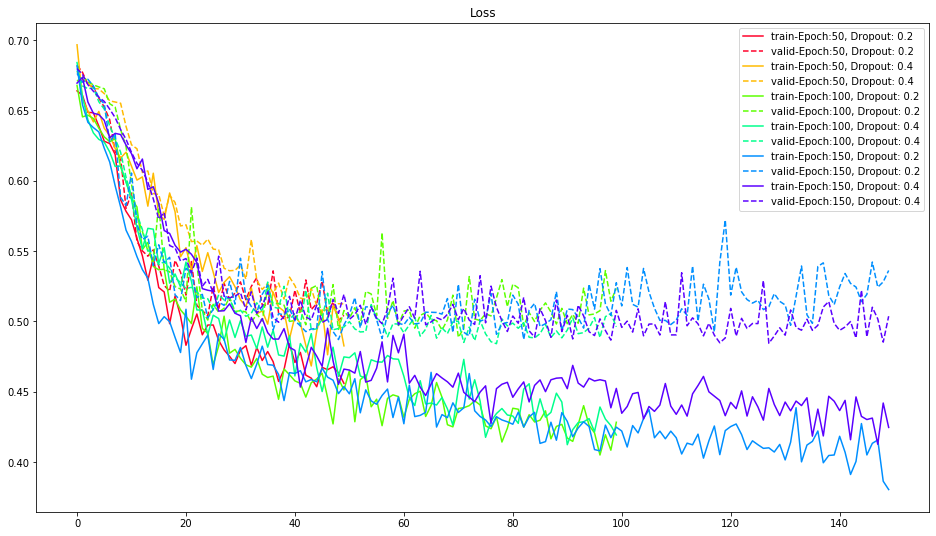

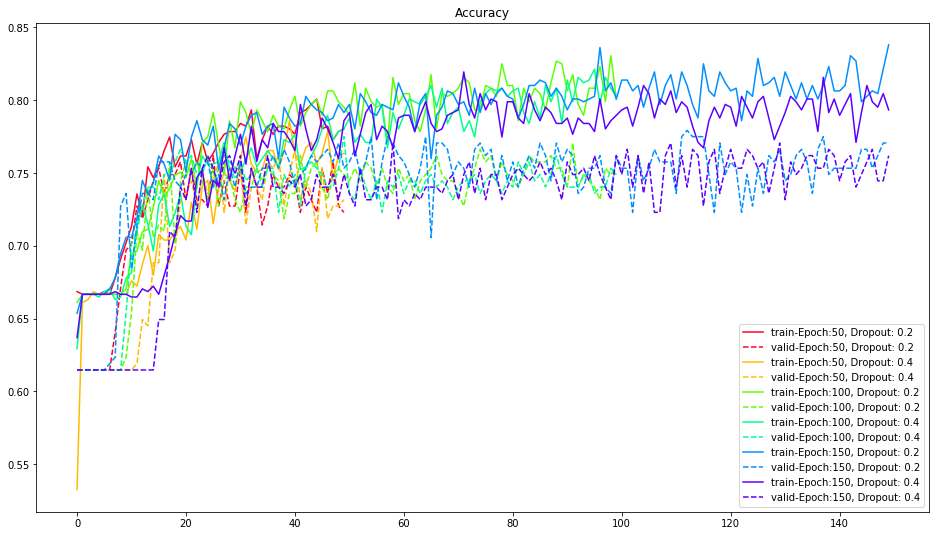

In [14]:
plt_model_result(results)